In [1]:
from numpy import linalg as LA
import numpy as np
from collections import deque

class DBscan :
    def __init__(self, eps=0.5, min_samples=5) :         
        self.eps = eps
        self.min_samples = min_samples
    def fit(self, X) :
        length=len(X)
        main_dots=[0]*length
        boundary_dots=[0]*length
        noisy_dots=[0]*length
        X=np.array(X)
        distance_matrix=[[0]*length for i in range(length)]
        used=[-1]*length
        self.labels = [0]*length
        #Определяем основные точки
        for i in range(length) :
            num_of_dots=0
            for j in range(length) :
                distance_matrix[i][j]=LA.norm(X[i]-X[j])
                distance_matrix[j][i]=LA.norm(X[i]-X[j])
                if i!=j :
                    if distance_matrix[i][j]<self.eps :
                        num_of_dots+=1
            if num_of_dots > self.min_samples :
                main_dots[i]=1
        #Определяем граничные и шумовые точки
        for i in range(length) :
            num_of_dots=0
            flag=0
            for j in range(length) :
                if i!=j :
                    if distance_matrix[i][j]<self.eps :
                        num_of_dots+=1
                        if main_dots[j]==1 :
                            flag=1
            if flag and num_of_dots <= self.min_samples  :
                boundary_dots[i]=1
            elif not flag and num_of_dots <= self.min_samples  :
                noisy_dots[i]=1
        #Формируем кластеры по основным точкам
        current_cluster=-1
        while True : 
            dq = deque()
            flag=1
            for i in range(length) :
                if main_dots[i] and used[i]==-1:
                    flag=0
                    used[i]=0
                    dq.append(i)
                    break
            if flag :
                break
            current_cluster+=1
            while len(dq) :
                dot=dq.popleft()
                used[dot]=1
                self.labels[dot]=current_cluster
                for j in range(length):
                    if distance_matrix[dot][j]<self.eps and main_dots[j] and used[j]==-1:
                        used[j]=0
                        dq.append(j)
        #Для граничных точек установим номер кластера по номеру кластера ближайшей основной точки
        for i in range(length) :
            if boundary_dots[i] :
                minimum=-1
                argmin=-1
                for j in range(length) :
                    if i!=j and main_dots[j] :
                        if minimum==-1 :
                            minimum=distance_matrix[i][j]
                            argmin=j
                        else :
                            if minimum>distance_matrix[i][j] :
                                minimum=distance_matrix[i][j]
                                argmin=j
                self.labels[i]=self.labels[argmin]
        #Шумовым точкам присвоим кластер -1
        for i in range(length) :
            if noisy_dots[i] :
                self.labels[i]=-1
        self.labels=np.array(self.labels) 

Создадим выборку для проверки работы алгоритма

Text(0, 0.5, 'x')

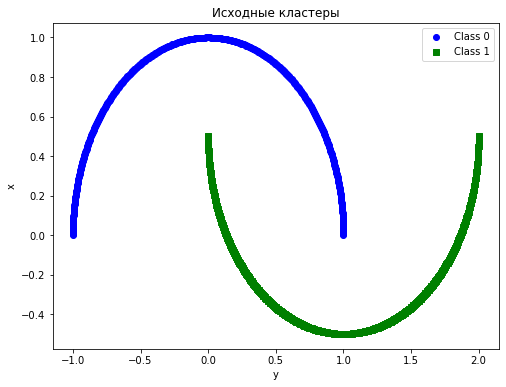

In [2]:
import sklearn.datasets
import matplotlib.pyplot as plt
X=sklearn.datasets.make_moons(n_samples=1000,  shuffle=True, noise=None, random_state=None)

plt.figure(figsize=(8, 6))
classes = set(X[1])
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.75', 'pink', 'orange']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x']
for i, cls in enumerate(classes):
    idx = X[1] == cls
    plt.scatter(X[0][idx, 0], X[0][idx, 1], c=colors[i], marker=markers[i], label=f'Class {cls}')

plt.legend(loc='best')
plt.title('Исходные кластеры')
plt.xlabel('y')
plt.ylabel('x')

Подаем датасет на вход алгоритму

In [3]:
dbscan=DBscan(eps=0.3, min_samples=3)
data=X[0]
data=np.array(data)
dbscan.fit(data)
labels=dbscan.labels

Text(0, 0.5, 'y')

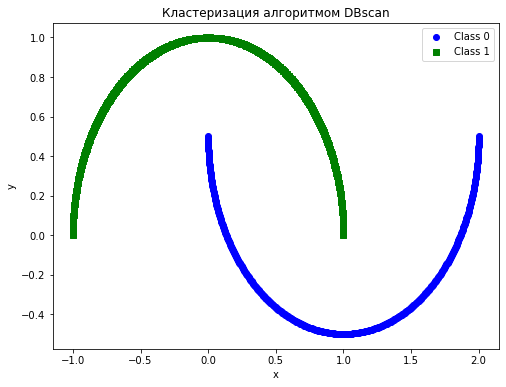

In [4]:
plt.figure(figsize=(8, 6))

labels=np.array(labels)
classes = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.75', 'pink', 'orange']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x']
for i, cls in enumerate(classes):
    idx = labels == cls
    plt.scatter(X[0][idx, 0], X[0][idx, 1], c=colors[i], marker=markers[i], label=f'Class {cls}')

plt.legend(loc='best')
plt.title('Кластеризация алгоритмом DBscan')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

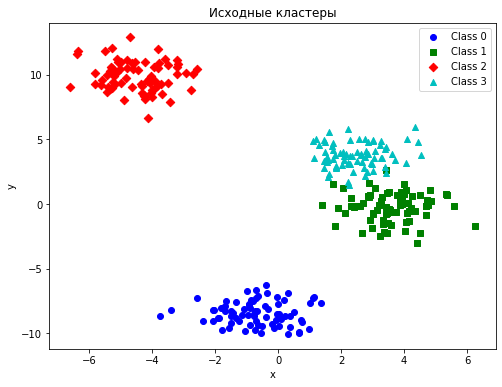

In [17]:
data, labels = sklearn.datasets.make_blobs(n_samples=300, n_features=2, centers=4)

plt.figure(figsize=(8, 6))

classes = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.75', 'pink', 'orange']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x']
for i, cls in enumerate(classes):
    idx = labels == cls
    plt.scatter(data[idx, 0], data[idx, 1], c=colors[i], marker=markers[i], label=f'Class {cls}')

plt.legend(loc='best')
plt.title('Исходные кластеры')
plt.xlabel('x')
plt.ylabel('y')

In [18]:
dbscan=DBscan(eps=0.8, min_samples=8)  #eps=1.5, min_samples=9     eps=1, min_samples=20
data=np.array(data)
dbscan.fit(data)
labels=dbscan.labels

Text(0, 0.5, 'y')

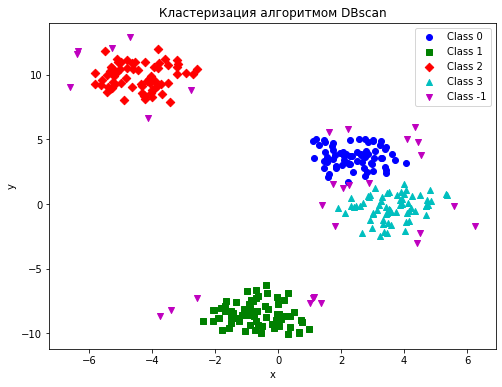

In [19]:
plt.figure(figsize=(8, 6))

classes = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.75', 'pink', 'orange']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x']
for i, cls in enumerate(classes):
    idx = labels == cls
    plt.scatter(data[idx, 0], data[idx, 1], c=colors[i], marker=markers[i], label=f'Class {cls}')

plt.legend(loc='best')


plt.title('Кластеризация алгоритмом DBscan')
plt.xlabel('x')
plt.ylabel('y')